# Time Series Forecasting (Continued)
**Project**: M5 Project 5
**Author**: Jacob Buysse

In this project we will be performing regression modeling on flights from the New York area and adding complimentary data to see how it improves perfromance.

In this notebook we will be using...

In [57]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
import scipy

We will configure our plots for readable labels, high resolution, and automatic layout.

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

## Part II

We will load our cleaned dataset and split it into a train/test set keeping the last year out for the testing set.

In [3]:
df = pd.read_feather('./counts.feather')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         1826 non-null   datetime64[ns]
 1   count                        1826 non-null   int64         
 2   year                         1826 non-null   category      
 3   doy                          1826 non-null   int64         
 4   month                        1826 non-null   category      
 5   weekday                      1826 non-null   category      
 6   weekend                      1826 non-null   bool          
 7   leapday                      1826 non-null   bool          
 8   PRCP                         1826 non-null   int64         
 9   SNOW                         1826 non-null   int64         
 10  SNWD                         1826 non-null   int64         
 11  TMAX                         1826 non-null 

In [4]:
test_mask = df.year == 2017
train_df = df[~test_mask]
test_df = df[test_mask]
print(f"Training size: {train_df.shape}, Testing size: {test_df.shape}")

Training size: (1461, 31), Testing size: (365, 31)


Linear Regression: r = -0.23832437454041616, p = 2.5812714220214682e-20, se = 0.006014670625694982


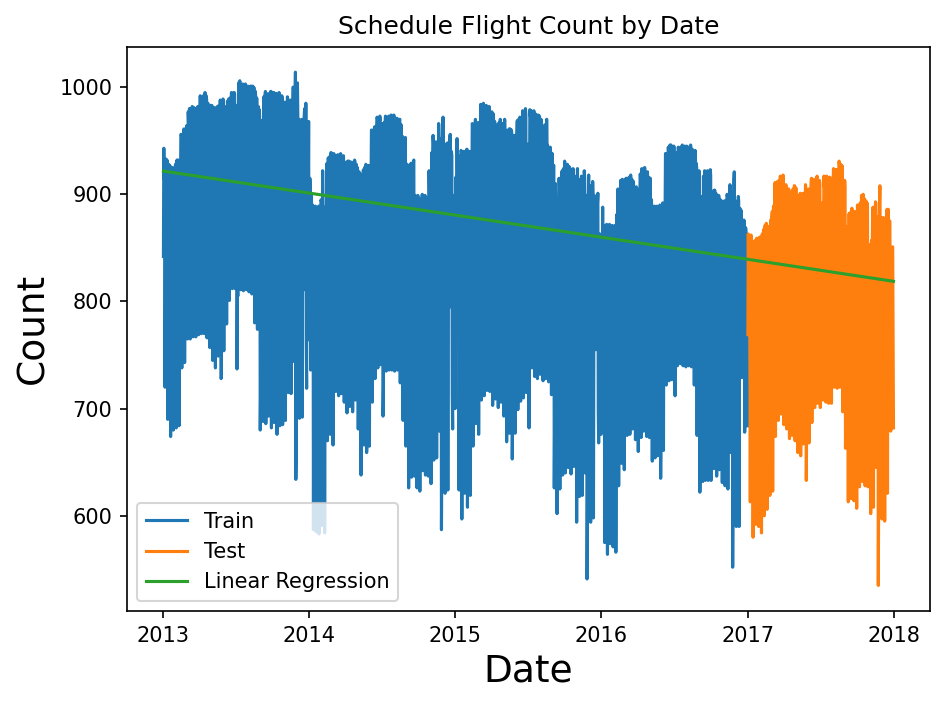

In [62]:
plot = sns.lineplot(train_df, x='date', y='count', label='Train')
sns.lineplot(test_df, x='date', y='count', label='Test')

first_date = datetime.datetime(year=2013, month=1, day=1)
last_date = datetime.datetime(year=2017, month=12, day=31)
day_serial = train_df.date.apply(lambda value: (value - first_date).days + 1)
slope, intercept, r, p, se = scipy.stats.linregress(day_serial, train_df['count'])
print(f"Linear Regression: r = {r}, p = {p}, se = {se}")
sns.lineplot(x=[first_date, last_date], y=[slope + intercept, slope * len(df) + intercept], label='Linear Regression')

plot.set(title='Schedule Flight Count by Date', xlabel='Date', ylabel='Count');